In [14]:
import pandas as pd
import support_functions as sf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importando application_train
df1=pd.read_csv(r"C:\Users\vinic\OneDrive\BigData & Analytics\hacktown\pod-academy-analise-de-credito-para-fintech\application_train.csv")
df1.shape


(215257, 172)

In [3]:
#importando application_train
df2=pd.read_csv(r"C:\Users\vinic\OneDrive\BigData & Analytics\hacktown\pod-academy-analise-de-credito-para-fintech\application_test.csv")
df2.shape

(92254, 171)

In [5]:
columns_not_in_df2 = set(df1.columns) - set(df2.columns)
columns_not_in_df2

{'TARGET'}

In [4]:
#Concatenando para montar a base completa
abt_00 = pd.concat([df1,df2])
abt_00.shape

(307511, 172)

In [18]:
# Obserbando os metadados
metadata_df=sf.generate_metadata(abt_00)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade,percet_cardinalidade
0,COMMONAREA_MODE,float64,214865,69.87,3128,1.02
1,COMMONAREA_AVG,float64,214865,69.87,3181,1.03
2,COMMONAREA_MEDI,float64,214865,69.87,3202,1.04
3,NONLIVINGAPARTMENTS_AVG,float64,213514,69.43,386,0.13
4,NONLIVINGAPARTMENTS_MEDI,float64,213514,69.43,214,0.07
...,...,...,...,...,...,...
168,REG_CITY_NOT_WORK_CITY,int64,0,0.00,2,0.00
169,REG_CITY_NOT_LIVE_CITY,int64,0,0.00,2,0.00
170,LIVE_REGION_NOT_WORK_REGION,int64,0,0.00,2,0.00
171,REG_REGION_NOT_WORK_REGION,int64,0,0.00,2,0.00


In [7]:
#Calcula a Porcentagem das Variáveis binárias ,incluindo o Target 
lista_var_bins=list(metadata_df[(metadata_df['cardinalidade'] ==2) & (metadata_df['tipo'] !='object')]['nome_variavel'])
pct_bins=abt_00[lista_var_bins].mean()


In [8]:
#Criando as variaveis de idade em anos
abt_00['YEARS_BIRTH']=abt_00['DAYS_BIRTH']/365
abt_00['YEARS_BIRTH']=-abt_00['YEARS_BIRTH'].round()


In [9]:
#Calcula as metricas de estatisticas descritivas das variaveis numéricas agrupadas pelo Target
grp=abt_00.groupby('TARGET')
desc=grp.describe()
desc.index = ['Adimplente', 'Inadimplente']

In [34]:
#Taxa de Inadimplncia
print("Taxa de Inadimplência: {:.2%}".format(abt_00['TARGET'].mean()))
print("Valor Total na Carteira: R$ {:2,.2f}".format(abt_00['AMT_CREDIT'].sum()))

#Ticket Médio de Inadimplncia
print("Valor Médio dos Empréstimos: R$ {:2,.2f}".format(abt_00['AMT_CREDIT'].mean()))

#Valor Total da Carteeira por Categoria
print("Valor Total dos Empréstimos por categoria:\n  Adimplente: R$ {:2,.2f} \n  Inadimplante: R$ {:2,.2f} ".format(abt_00.loc[abt_00['TARGET']==0,'AMT_CREDIT'].sum(),abt_00.loc[abt_00['TARGET']==1,'AMT_CREDIT'].sum()))

#Ticket Médio de Inadimplncia
print("Valor Médio dos Empréstimos por categoria:\n  Adimplente: R$ {:2,.2f} \n  Inadimplante: R$ {:2,.2f} ".format(desc[('AMT_CREDIT','mean')][0],desc[('AMT_CREDIT','mean')][1]))

Taxa de Inadimplência: 8.09%
Valor Total na Carteira: R$ 184,207,084,195.50
Valor Médio dos Empréstimos: R$ 599,026.00
Valor Total dos Empréstimos por categoria:
  Adimplente: R$ 119,341,198,282.50 
  Inadimplante: R$ 9,704,511,850.50 
Valor Médio dos Empréstimos por categoria:
  Adimplente: R$ 603,205.53 
  Inadimplante: R$ 557,346.19 


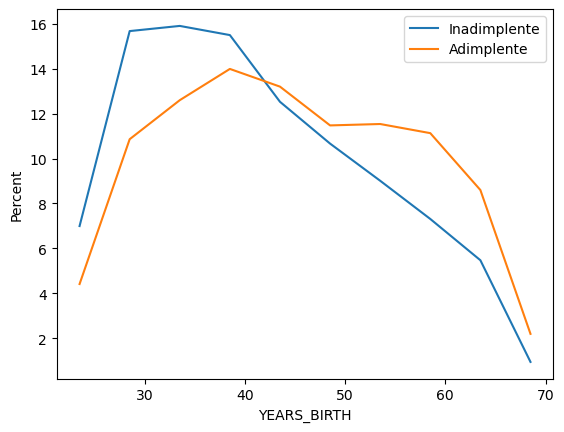

Média de Idade em anos:
                     Adimplente  Inadimplente
YEARS_BIRTH mean   44.206803     40.767344


In [16]:
## Faixa de idade
sns.histplot(data=abt_00.loc[abt_00['TARGET']==1],x='YEARS_BIRTH',binwidth=5,
             stat='percent',element='poly',fill=False,label='Inadimplente')
## Faixa de idade
sns.histplot(data=abt_00.loc[abt_00['TARGET']==0],x='YEARS_BIRTH',binwidth=5,
             stat='percent',element='poly',fill=False,label='Adimplente')
plt.legend()
plt.show()
#Ticket Médio de Inadimplncia
print("Média de Idade em anos:\n  ",desc[[('YEARS_BIRTH','mean')]].T)